In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

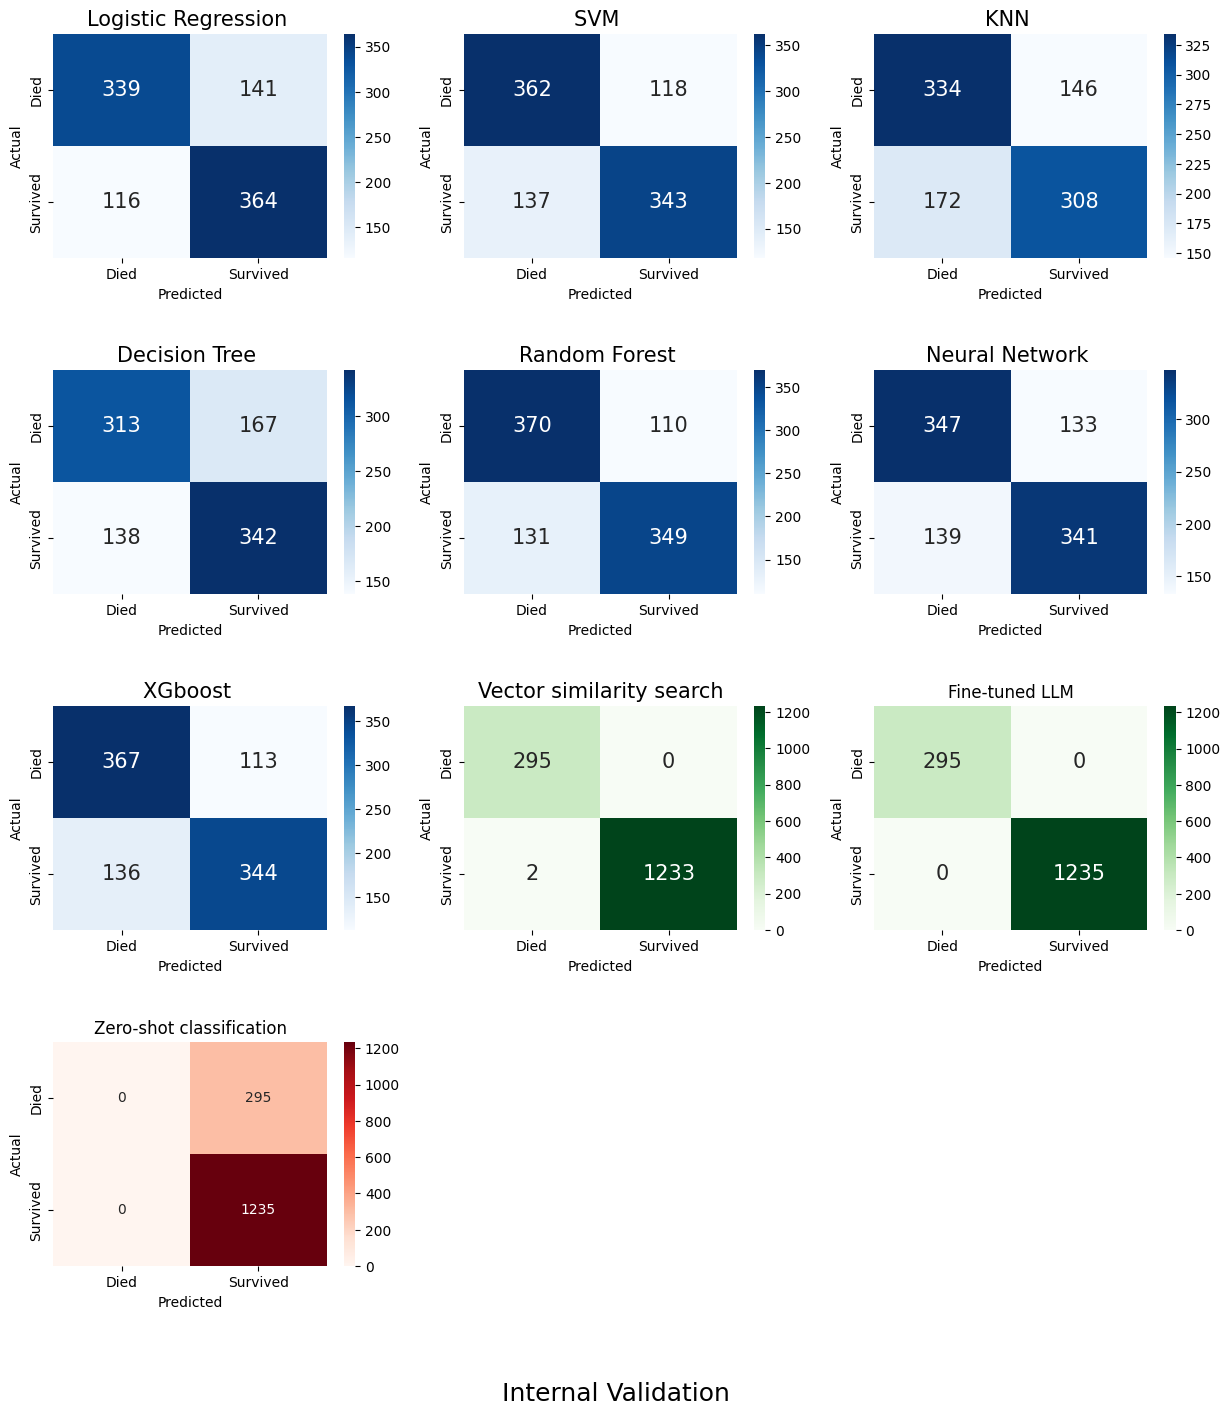

In [2]:
import pandas as pd
import ast
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data for internal validation
df_internal_vector = pd.read_excel("Vector_database_internal_results.xlsx")
y_true_internal_vector = df_internal_vector["y_true"]
y_pred_internal_vector = df_internal_vector["y_pred"]
cm_internal_vector = confusion_matrix(y_true_internal_vector, y_pred_internal_vector)

# Read the data once
df = pd.read_excel("CML.xlsx")

# Create a list of models
models = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Neural Network', 'XGboost']

# Determine the number of rows and columns for subplots
num_rows = 4
num_cols = 3

# Create subplots with a gray background
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Iterate over models and plot confusion matrix
for i, model in enumerate(models):
    y_true = ast.literal_eval(df.loc[i, 'y_true'])
    y_pred = ast.literal_eval(df.loc[i, 'y_predicted'])

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a heatmap using seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'],
                ax=axes[i], annot_kws={'fontsize': 15})  # Adjust the fontsize as needed
    
    axes[i].set_title(f'{model} ', fontsize=15)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# Add internal validation plot for Vector Database
plt.subplot(num_rows, num_cols, len(models) + 1)
sns.heatmap(cm_internal_vector, annot=True, fmt='d', cmap='Greens', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'],
            ax=axes[len(models)], annot_kws={'fontsize': 15})
axes[len(models)].set_title('Vector similarity search', fontsize=15)
axes[len(models)].set_xlabel('Predicted')
axes[len(models)].set_ylabel('Actual')

# Add internal fine-tuning plot
# Read the data for internal fine-tuning
df_internal_fine_tuning = pd.read_excel("zephyr_Internal_fine_tuning_results.xlsx")
y_true_internal_fine_tuning = df_internal_fine_tuning["y_true"]
y_pred_internal_fine_tuning = df_internal_fine_tuning["y_pred"]

# Create confusion matrix for internal fine-tuning
cm_internal_fine_tuning = confusion_matrix(y_true_internal_fine_tuning, y_pred_internal_fine_tuning)

# Create a heatmap using seaborn for internal fine-tuning
plt.subplot(num_rows, num_cols, len(models) + 2)
sns.heatmap(cm_internal_fine_tuning, annot=True, fmt='d', cmap='Greens', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'],
            annot_kws={"fontsize": 15})  # Adjust fontsize as needed
plt.title('Fine-tuned LLM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Load data for zero-shot classification
df_zero_shot = pd.read_excel("zero_shot_internal.xlsx")
y_true_zero_shot = df_zero_shot["y_true"]
y_pred_zero_shot = df_zero_shot["y_pred"]

# Create confusion matrix for zero-shot classification
cm_zero_shot = confusion_matrix(y_true_zero_shot, y_pred_zero_shot)

# Create a heatmap using seaborn for zero-shot classification
plt.subplot(num_rows, num_cols, len(models) + 3)
sns.heatmap(cm_zero_shot, annot=True, fmt='d', cmap='Reds', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Zero-shot classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Remove empty subplots
for i in range(len(models) + 4, num_rows * num_cols + 1):
    fig.delaxes(axes[i - 1])

# Add a note under the subplots
fig.text(0.5, 0.03, 'Internal Validation', ha='center', fontsize=18, va='center')

# Adjust layout
plt.subplots_adjust(hspace=0.5)

plt.show()


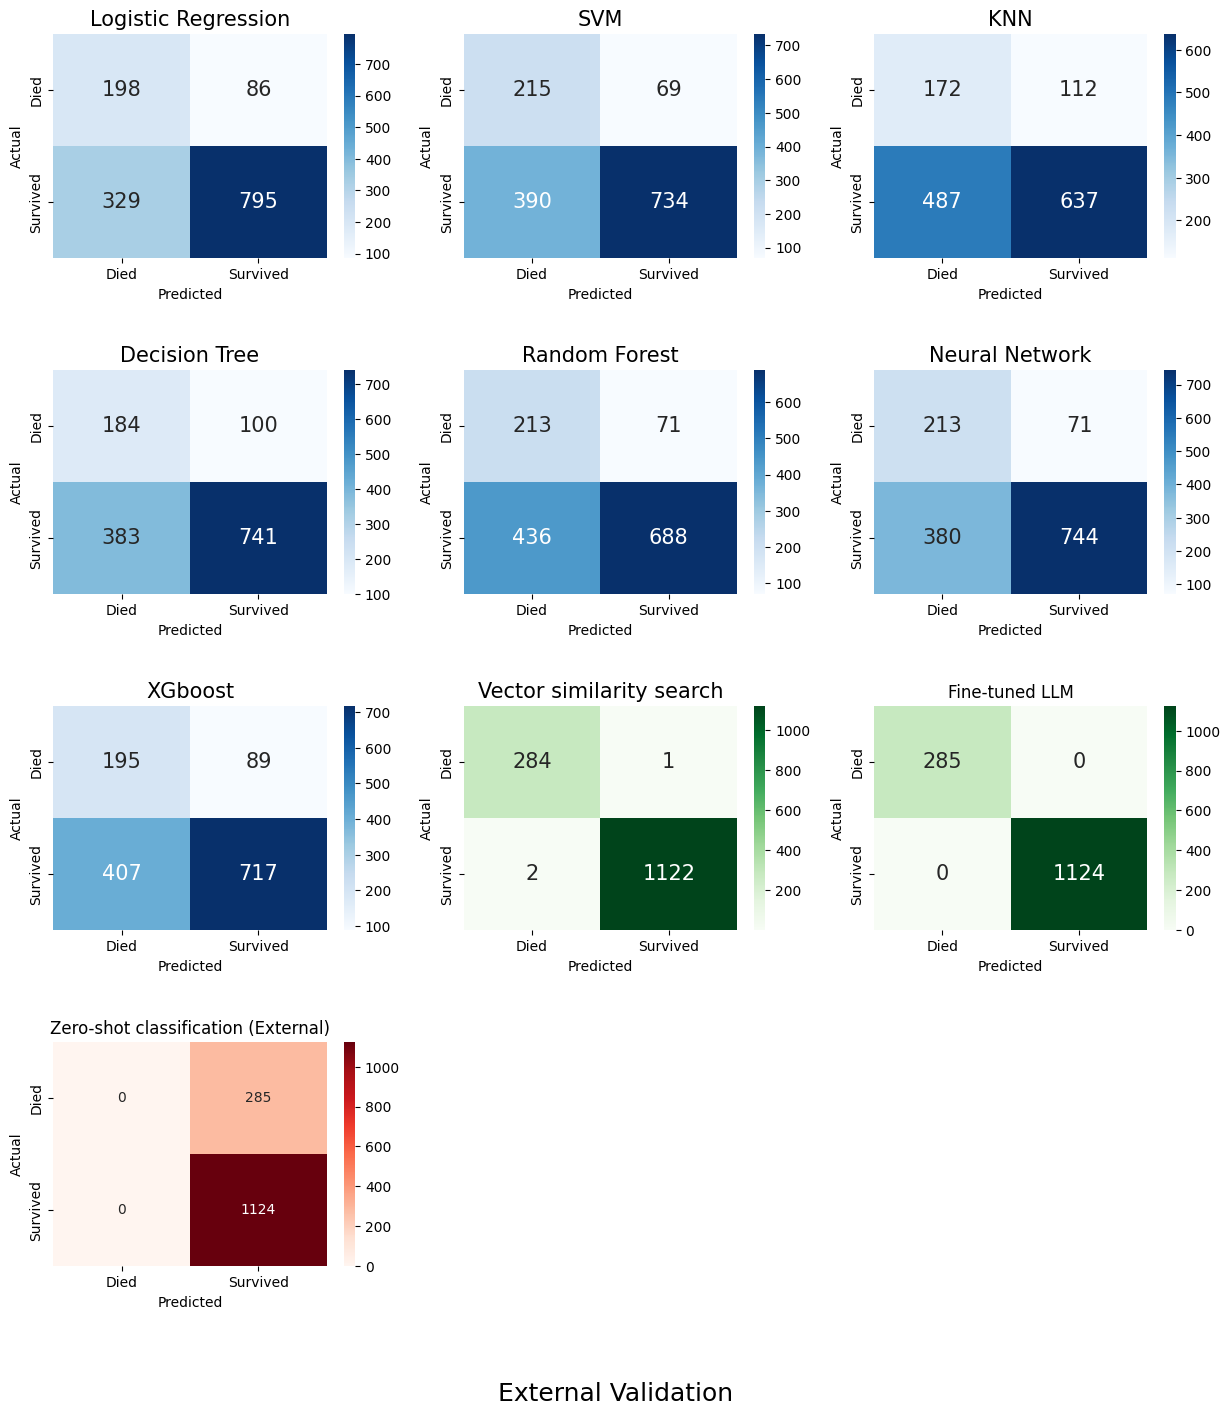

In [3]:
import pandas as pd
import ast
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data once
df = pd.read_excel("CML.xlsx")

# Create a list of models
models = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Neural Network', 'XGboost']

# Determine the number of rows and columns for subplots
num_rows = 4
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Iterate over models and plot confusion matrix
for i, model in enumerate(models):
    y_true = ast.literal_eval(df.loc[i, 'y_true_ex'])
    y_pred = ast.literal_eval(df.loc[i, 'y_predicted_ex'])

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a heatmap using seaborn with increased font size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'],
                ax=axes[i], annot_kws={"fontsize": 15})  # Adjust fontsize as needed
    
    axes[i].set_title(f'{model}', fontsize=15)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# Add external validation plot for Vector Database
# Load data for external validation
df_external_vector = pd.read_excel("Vector_database_external_results.xlsx")
y_true_external_vector = df_external_vector["y_true"]
y_pred_external_vector = df_external_vector["y_pred"]
cm_external_vector = confusion_matrix(y_true_external_vector, y_pred_external_vector)

# Create a heatmap using seaborn for external validation
plt.subplot(num_rows, num_cols, len(models) + 1)
sns.heatmap(cm_external_vector, annot=True, fmt='d', cmap='Greens', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'],
            ax=axes[len(models)], annot_kws={"fontsize": 15})
axes[len(models)].set_title('Vector similarity search', fontsize=15)
axes[len(models)].set_xlabel('Predicted')
axes[len(models)].set_ylabel('Actual')

# Add external fine-tuning plot
# Read the data for external fine-tuning
df_external_fine_tuning = pd.read_excel("zephyr_external_fine_tuning_results.xlsx")
y_true_external_fine_tuning = df_external_fine_tuning["y_true"]
y_pred_external_fine_tuning = df_external_fine_tuning["y_pred"]

# Create confusion matrix for external fine-tuning
cm_external_fine_tuning = confusion_matrix(y_true_external_fine_tuning, y_pred_external_fine_tuning)

# Create a heatmap using seaborn for external fine-tuning
plt.subplot(num_rows, num_cols, len(models) + 2)
sns.heatmap(cm_external_fine_tuning, annot=True, fmt='d', cmap='Greens', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'],
            annot_kws={"fontsize": 15})  # Adjust fontsize as needed
plt.title('Fine-tuned LLM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Load data for zero-shot classification (external)
df_zero_shot_external = pd.read_excel("zero_shot_external.xlsx")
y_true_zero_shot_external = df_zero_shot_external["y_true"]
y_pred_zero_shot_external = df_zero_shot_external["y_pred"]

# Create confusion matrix for zero-shot classification (external)
cm_zero_shot_external = confusion_matrix(y_true_zero_shot_external, y_pred_zero_shot_external)

# Create a heatmap using seaborn for zero-shot classification (external)
plt.subplot(num_rows, num_cols, len(models) + 3)
sns.heatmap(cm_zero_shot_external, annot=True, fmt='d', cmap='Reds', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Zero-shot classification (External)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Remove empty subplots
for i in range(len(models) + 4, num_rows * num_cols + 1):
    fig.delaxes(axes[i - 1])

# Add a note under the subplots
fig.text(0.5, 0.03, 'External Validation', ha='center', fontsize=18, va='center')

# Adjust layout
plt.subplots_adjust(hspace=0.5)

plt.show()
